# Get cocrystalized molecules from PDB

- Extract the cocrystalized molecules from the PDB structures.
- The active site is defined by a reference PDB structure and the name of the cocrystalized molecule (3-letter identifier code).

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import itertools
from pathlib import Path
from prody import parsePDB
import sys
sys.path.insert(0, '../..')
from helper_modules.get_cocristalized_ligands \
     import get_pocket_ligand, PocketResidues

- Load the table containing the PDBs metadata.

In [3]:
prot_name  = 'cdk2'

In [3]:
path_df_file = glob(f"./TABLA_MTDATA_{prot_name.upper()}_*_crys.json")[0]
df_prot      = pd.read_json(path_df_file)
df_prot.set_index('PDB_ID', inplace=True)
df_prot.tail(3)

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs
PDB_ID,,,,,,,,,,,,
6q4i,cdk2 in complex with fraglite35,2019-03-20,1,A,1.11,297,96.644295,2,"[8, 4]","[[38, 45], [153, 156]]",2,"[DMS, HGK]"
6q4j,cdk2 in complex with fraglite34,2019-03-20,1,A,1.05,298,96.979866,2,"[9, 3]","[[39, 47], [155, 157]]",2,"[DMS, HHB]"
6q4k,cdk2 in complex with fraglite38,2019-03-20,1,A,1.06,298,97.651007,2,"[8, 2]","[[39, 46], [125, 126]]",2,"[EDO, HHW]"


- How many PDB entries have a cocristalized molecule?

In [4]:
df_prot_ligs = df_prot[df_prot.NumLigs > 0]
print(F'{len(df_prot_ligs)} of {len(df_prot)} structures have at least one HETATM molecule.')

395 of 402 structures have at least one HETATM molecule.


- How many different small molecules (HETAMT) are there?

In [5]:
# How many cocrystalized molecules are there?
# A set of all HETATM molecules
lig_full_list = list( itertools.chain.from_iterable( df_prot.NameLigs ) )
print(f'There are a total of {len(lig_full_list)}', 
       'HETATM molecules (duplicates included).')

lig_all_list = list(set(lig_full_list))
print(f'There are {len(lig_all_list)} unique', 
       'HETATM molecules (without duplicates).')

There are a total of 759 HETATM molecules (duplicates included).
There are 365 unique HETATM molecules (without duplicates).


### Visualize the pocket residues

In [6]:
# Use a reference structure to visualize the pocket residues
ref_struc_id    = '1aq1'
ref_ligand_name = 'STU'

In [7]:
pkt_info = PocketResidues(ref_struc_id, 'STU')
pocket_residues_str = pkt_info.get_pocket_residues_as_list()
print('Indices of pocket redsidues:', pocket_residues_str)

Indices of pocket redsidues: 10 11 12 13 14 15 16 17 18 30 31 32 33 64 65 78 80 81 82 83 84 85 86 87 88 89 130 131 132 133 134 135 144 145 146 148 162


In [14]:
view = pkt_info.visualize_pocket()
view

NGLWidget()

In [17]:
view.render_image()

Image(value=b'', width='99%')

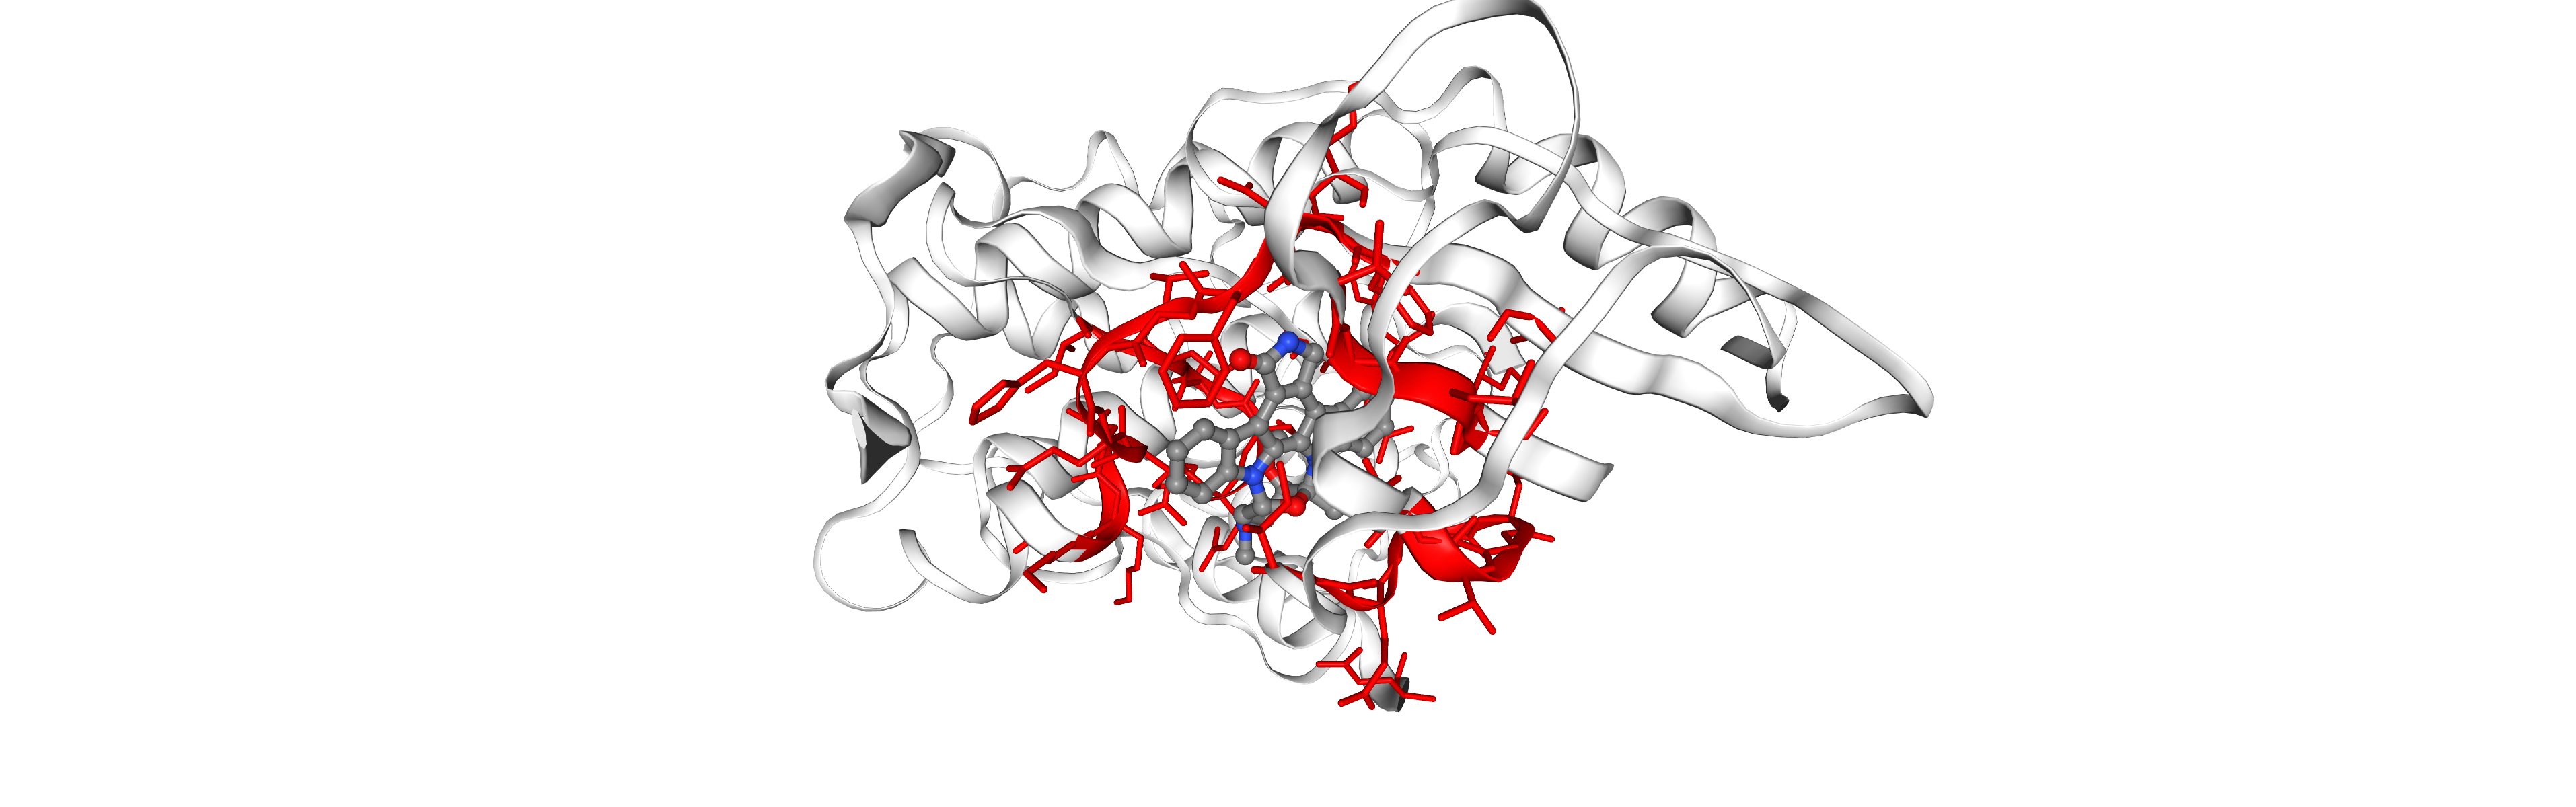

In [18]:
view._display_image()

## Carry out the Analysis
- Define the input files and the output directory.

In [11]:
# Define the output directories
OUT_MAIN          = './pdb_structures'
IN_DIR_ENSEMBLE   = f'{OUT_MAIN}/pdb_prepared'
IN_DIR_RAW_LIGS   = f'{OUT_MAIN}/raw_ligands'
OUT_DIR_PREP_LIGS = f'{OUT_MAIN}/pocket_ligands'

# Create the output directory if it doesnt exists
Path(OUT_DIR_PREP_LIGS).mkdir(parents = True, exist_ok = True)

- Update the main Dataframe with ligands information
 - Inhib: Name of the molecule found inside the pocket.
 - Inhib_mass: Molecular weight of the found molecule.
Save the updated dataframe:

In [12]:
# We will add two new columns to the dataframe
df_prot["Inhib"] = ""
df_prot["Inhib_mass"] = np.nan

# Get all pocket ligands
for pdb_id in df_prot.index:
    inhibidor = get_pocket_ligand(
                        pdb_id = pdb_id, 
                        pocket_residues = pocket_residues_str,
                        raw_lig_dir     = IN_DIR_RAW_LIGS,
                        prot_chain_dir  = IN_DIR_ENSEMBLE,
                        pk_ligs_dir = OUT_DIR_PREP_LIGS,
                        write_files = True, 
                        cutoff      = 8,
                        min_weight  = 97
                 )

    df_prot.at[str(pdb_id), 'Inhib'] = inhibidor[0]
    df_prot.at[pdb_id, 'Inhib_mass'] = inhibidor[1]
print('...')

Protein 1aq1:
   Molecules found: ['HOH' 'STU'] -> ligand STU saved.
Protein 1b38:
   Molecules found: ['ACE' 'ATP' 'HOH' 'MG'] -> ligand ATP saved.
Protein 1b39:
   Molecules found: ['ACE' 'ATP' 'HOH' 'MG'] -> ligand ATP saved.
The model 1buh HAS NO LIGAND inside the pocket.
Protein 1ckp:
   Molecules found: ['EDO' 'HOH' 'PVB'] -> ligand PVB saved.
Protein 1di8:
   Molecules found: ['DTQ' 'HOH'] -> ligand DTQ saved.
Protein 1dm2:
   Molecules found: ['EDO' 'HMD' 'HOH'] -> ligand HMD saved.
Protein 1e1v:
   Molecules found: ['ACE' 'CMG' 'HOH'] -> ligand CMG saved.
Protein 1e1x:
   Molecules found: ['ACE' 'HOH' 'NW1'] -> ligand NW1 saved.
Protein 1e9h:
   Molecules found: ['HOH' 'INR' 'TPO'] -> ligand INR saved.
The model 1f5q HAS NO LIGAND inside the pocket.
Protein 1fin:
   Molecules found: ['ATP' 'HOH'] -> ligand ATP saved.
Protein 1fq1:
   Molecules found: ['ATP' 'MG' 'TPO'] -> ligand ATP saved.
Protein 1fvt:
   Molecules found: ['106' 'HOH'] -> ligand 106 saved.
Protein 1fvv:
   Mo

### Updated Dataframe

In [4]:
file = f'TABLA_MTDATA_{prot_name.upper()}_402_crys_LIGS_INFO.json'
if Path(file).exists():
    df_prot = pd.read_json(file)
else:
    df_prot.to_json(file)
df_prot.head()

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs,Inhib,Inhib_mass
1aq1,human cyclin dependent kinase 2 complexed with...,1997-11-12,1,A,2.00,298,92.953020,2,"[9, 14]","[[36, 44], [149, 162]]",1,[STU],STU,440.0
1b38,human cyclin-dependent kinase 2,1998-12-23,1,A,2.00,298,97.315436,1,[9],"[[36, 44]]",3,"[ACE, ATP, MG]",ATP,398.0
1b39,human cyclin-dependent kinase 2 phosphorylated...,1998-12-23,1,A,2.10,298,97.315436,1,[9],"[[36, 44]]",3,"[ACE, ATP, MG]",ATP,398.0
1buh,crystal structure of the human cdk2 kinase com...,1998-09-09,2,A,2.60,298,96.308725,2,"[8, 5]","[[40, 47], [295, 299]]",0,[],None,NaN
1ckp,human cyclin dependent kinase 2 complexed with...,1999-01-13,1,A,2.05,298,93.624161,2,"[9, 12]","[[36, 44], [153, 164]]",2,"[EDO, PVB]",PVB,214.0
